In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [48]:
data02 = pd.read_csv(filepath_or_buffer = "C:/Yoshinon/Variedades/Universidad 100% real vol 2/Analisis de datos/Tarea 2/framingham.csv")

In [49]:
data02.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [50]:
data02.male.value_counts().sort_index()

0    2419
1    1819
Name: male, dtype: int64

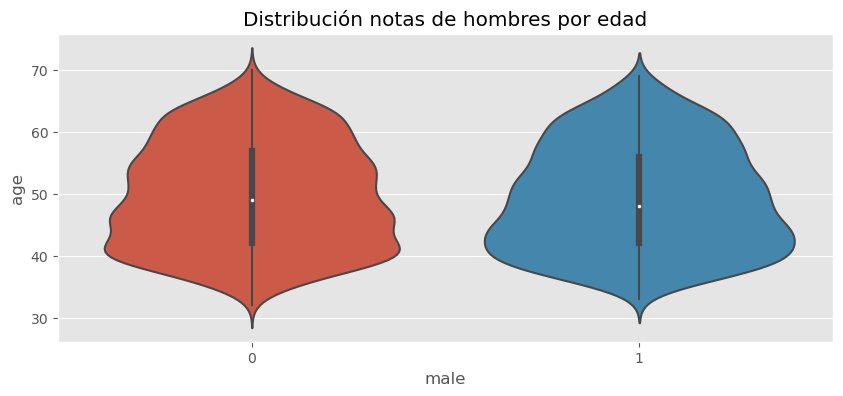

In [51]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.violinplot(
        x     = 'male',
        y     = 'age',
        data  = data02,
        ax    = ax
    )

ax.set_title('Distribución notas de hombres por edad');

In [52]:
X = data02[['male']]
y = data02['age']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
modelo = LogisticRegression(penalty='none')
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LogisticRegression(penalty='none')

In [53]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(X, y))

Intercept: [-3.53807629 -2.45103694 -1.24749127 -0.40967664 -0.14324814  0.14460067
  0.51580242  0.82419745  0.99791304  0.84907692  0.79884981  0.71764875
  0.77306374  0.75912998  0.96631492  0.65995374  0.61440119  0.64492353
  0.58233273  0.73194239  0.56623935  0.62968115  0.515663    0.86231915
  0.61415575  0.48058207  0.40656737  0.68936271  0.30531318  0.38694885
  0.19341598  0.51572035  0.23985645 -0.14385272 -0.45216481 -0.45370061
 -2.16410218 -2.44455076 -3.53807629]
Coeficiente: [('male', -6.501793236191675)]
Accuracy de entrenamiento: 0.04672015101462954


In [54]:
predicciones = modelo.predict_proba(X = X_test)
predicciones = pd.DataFrame(predicciones, columns = modelo.classes_)
predicciones.head(3)

,32,33,34,35,36,37,38,39,40,41,...,61,62,63,64,65,66,67,68,69,70
0,5.457219e-07,0.001415,0.003541,0.008441,0.022515,0.025326,0.037305,0.038700,0.044295,0.039406,...,0.022522,0.023213,0.023928,0.021103,0.011966,0.007044,0.010555,0.007048,0.002108,5.457219e-07
1,5.457219e-07,0.001415,0.003541,0.008441,0.022515,0.025326,0.037305,0.038700,0.044295,0.039406,...,0.022522,0.023213,0.023928,0.021103,0.011966,0.007044,0.010555,0.007048,0.002108,5.457219e-07
2,5.112957e-04,0.001516,0.005052,0.011677,0.015241,0.020325,0.029461,0.040104,0.047712,0.041114,...,0.025899,0.021342,0.029459,0.022357,0.015232,0.011191,0.011174,0.002020,0.001526,5.112957e-04


In [41]:
predicciones = modelo.predict(X = X_test)
predicciones

array([44, 44, 40, 44, 40, 44, 40, 44, 40, 40, 40, 40, 40, 40, 40, 44, 40,
       44, 40, 40, 40, 44, 40, 40, 40, 44, 40, 40, 44, 44, 44, 40, 44, 44,
       44, 40, 40, 44, 44, 40, 44, 44, 40, 44, 40, 44, 44, 44, 40, 44, 44,
       44, 40, 40, 44, 44, 40, 40, 40, 40, 44, 40, 40, 44, 40, 40, 44, 40,
       44, 40, 40, 40, 40, 40, 40, 44, 40, 40, 40, 44, 40, 40, 44, 40, 44,
       40, 44, 40, 40, 40, 40, 44, 44, 40, 40, 40, 40, 44, 40, 44, 40, 44,
       44, 44, 44, 44, 44, 44, 40, 44, 40, 44, 40, 44, 44, 40, 44, 44, 40,
       44, 44, 40, 40, 40, 40, 40, 40, 40, 44, 40, 40, 40, 44, 40, 44, 44,
       44, 40, 44, 40, 40, 44, 40, 40, 40, 44, 44, 44, 40, 44, 40, 44, 40,
       40, 40, 44, 40, 40, 40, 40, 40, 40, 44, 40, 40, 44, 44, 44, 44, 40,
       40, 40, 44, 40, 44, 40, 44, 40, 44, 44, 44, 40, 40, 44, 40, 44, 44,
       44, 44, 44, 44, 44, 40, 40, 40, 40, 44, 40, 44, 44, 40, 40, 44, 40,
       40, 40, 44, 44, 44, 44, 44, 40, 40, 44, 40, 44, 44, 40, 44, 40, 40,
       40, 40, 44, 40, 40